In [1]:
import json
import pandas as pd
from glob import glob
import csv
import numpy as np
import matplotlib.pyplot as plt
import collections

In [2]:
review_path = '/home/kalvin_kao/yelp_challenge_dataset/review.csv'
business_path = '/home/kalvin_kao/yelp_challenge_dataset/business.csv'

In [3]:
review_df = pd.read_csv(review_path)

In [4]:
business_df = pd.read_csv(business_path)

In [5]:
#review_df.shape

In [6]:
#print(review_df[review_df['stars']==5].head())
#print(review_df[review_df['stars']==5].shape)

In [25]:
five_star_review_df = review_df[review_df['stars']==1]
five_star_review_series = five_star_review_df['text']

In [26]:
#print(five_star_review_df.tail())
print(five_star_review_series.tail())

5261639    b"All I have to say is thank GOD I have a lot ...
5261645    b'Was there for a wedding with your standard 1...
5261648    b"Went to this restaurant for Dim Sum.  Asked ...
5261662    b"This place is retarded!!!  Called on a thurs...
5261664    b"Bought groupon $39 for 4 months from groupon...
Name: text, dtype: object


In [8]:
print(review_df['text'][50])

b'Love this place!\n\nThe cakes are delicious but really rich! They have cute cupcakes and lots of macaroons. \n\nThe best part - they now have a gluten free chocolate cake - which hubby and I think is better than the regular cake!'


In [9]:
test_a = "this is a test"
print(test_a.split())

['this', 'is', 'a', 'test']


In [6]:
#build a list of list of characters from the 5-star reviews
def preprocess_review_series_v3(review_series):
    review_list = []
    for new_review in review_series:
        clipped_review = new_review[2:-1]
        char_list = list(clipped_review.lower())
        semifinal_review = []
        last_char = ''
        for ascii_char in char_list:
            if ascii_char == '\\' or last_char == '\\':
                pass
            else:
                semifinal_review.append(ascii_char)
            last_char = ascii_char
        if len(semifinal_review) > 300:
            #final_review = ['<SOR>'] + semifinal_review + ['<EOR>']
            #print(final_review)
            review_list.append(semifinal_review)
    return review_list

In [7]:
#build a list of list of characters from the 5-star reviews
def preprocess_review_series_v2(review_series):
    review_list = []
    for new_review in review_series:
        clipped_review = new_review[2:-1]
        char_list = list(clipped_review.lower())
        semifinal_review = []
        last_char = ''
        for ascii_char in char_list:
            if ascii_char == '\\' or last_char == '\\':
                pass
            else:
                semifinal_review.append(ascii_char)
            last_char = ascii_char
        if len(semifinal_review) > 300:
            final_review = ['<SOR>'] + semifinal_review + ['<EOR>']
            #print(final_review)
            review_list.append(final_review)
    return review_list

In [7]:
#build a list of list of characters from the 5-star reviews
def preprocess_review_series(review_series):
    review_list = []
    for new_review in review_series:
        clipped_review = new_review[2:-1]
        char_list = list(clipped_review.lower())
        semifinal_review = []
        last_char = ''
        for ascii_char in char_list:
            if ascii_char == '\\' or last_char == '\\':
                pass
            else:
                semifinal_review.append(ascii_char)
            last_char = ascii_char
        if len(semifinal_review) > 300:
            final_review = ['<SOR>'] + semifinal_review + ['<EOR>']
            #print(final_review)
            review_list.append(final_review)
    return review_list

In [16]:
#preprocessed reviews
review_list = preprocess_review_series(five_star_review_series)

In [27]:
review_list = preprocess_review_series_v3(five_star_review_series)

In [28]:
len(review_list)

548086

In [10]:
review_list[4]

['t',
 'h',
 'i',
 's',
 ' ',
 'p',
 'l',
 'a',
 'c',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'a',
 'w',
 'e',
 's',
 'o',
 'm',
 'e',
 '!',
 ' ',
 'd',
 'e',
 'f',
 'i',
 'n',
 'i',
 't',
 'e',
 'l',
 'y',
 ' ',
 'a',
 'u',
 't',
 'h',
 'e',
 'n',
 't',
 'i',
 'c',
 '!',
 '!',
 '!',
 'm',
 'y',
 ' ',
 't',
 'w',
 'o',
 ' ',
 'f',
 'a',
 'v',
 'o',
 'u',
 'r',
 'i',
 't',
 'e',
 ' ',
 'd',
 'i',
 's',
 'h',
 'e',
 's',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'r',
 'i',
 'c',
 'e',
 ' ',
 'f',
 'l',
 'o',
 'u',
 'r',
 ' ',
 'r',
 'o',
 'l',
 'l',
 's',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'c',
 'h',
 'i',
 'c',
 'k',
 'e',
 'n',
 ' ',
 'p',
 'h',
 'o',
 '.',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'r',
 'i',
 'c',
 'e',
 ' ',
 'f',
 'l',
 'o',
 'u',
 'r',
 ' ',
 'r',
 'o',
 'l',
 'l',
 's',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'a',
 'l',
 'w',
 'a',
 'y',
 's',
 ' ',
 'f',
 'r',
 'e',
 's',
 'h',
 ' ',
 'w',
 'h',
 'e',
 'n',
 'e',
 'v',
 'e',
 'r',
 ' ',
 'i',
 "'",
 'm',
 ' '

In [29]:
word_level_reviews = ["".join(sublist) for sublist in review_list]

In [30]:
word_level_reviews[:5]

["i thought tidy's flowers had a great reputation as a florist, but i guess i was wrong!for valentine's day my boyfriend had ordered roses with tidy's. however, the flowers that were delivered was not what he had ordered. he had placed in an order for long stem roses, mixed with orchids and was charged for that. what had showed up was a small vase with 4 short cut roses and some greens - table ornament, not really valentine's day flowers. in speaking with another friend, something similar happened to her - her fiancee had ordered a dozen of roses for her for valentine's day while he was in germany as a surprise and they never showed up. so when he called them to complaint, they actually then called up my friend to confirm whether or not she had received the flowers. which she didn't, so they said they would resend - only to have them deliver it to the wrong place.understanding that valentine's day is the most busiest day for florists and mistakes do happen, the way they had handled it 

In [17]:
len(word_level_reviews[0].split()[1])

10

In [14]:
total_chars = 0
total_words = 0
chars_by_review = []
words_by_review = []
for review in word_level_reviews:
    chars = 0
    words = 0
    word_list = review.split()
    for word in word_list:
        total_chars += len(word)
        total_words += 1
        chars += len(word)
        words += 1
    chars_by_review.append(chars)
    words_by_review.append(words)

In [15]:
print(total_chars/total_words)

4.456137531468964


In [22]:
150/5.6

26.78571428571429

In [23]:
chars_by_review_2 = np.array(chars_by_review, dtype=np.float)
words_by_review_2 = np.array(words_by_review, dtype=np.float)

In [24]:
chars_per_word_by_review = chars_by_review_2/words_by_review_2

In [31]:
chars_per_word_by_review_v2 = pd.Series(chars_per_word_by_review)

In [32]:
chars_per_word_by_review_v2.describe()

count    1.287777e+06
mean     4.746888e+00
std      1.486093e+01
min      1.729084e+00
25%      4.333333e+00
50%      4.530120e+00
75%      4.756972e+00
max      4.270000e+03
dtype: float64

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

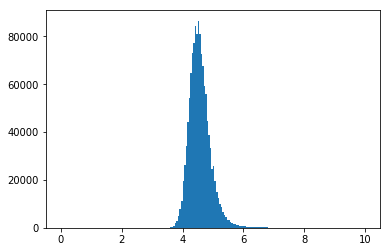

In [33]:
#bins = numpy.linspace(0, 4300, 100)
plt.hist(chars_per_word_by_review, bins=200, range=(0,10))

In [20]:
#combined_review_list = [item for sublist in review_list for item in sublist]
training_review_list = [item for sublist in review_list[:250000] for item in sublist]

In [31]:
training_review_list = [item for sublist in review_list for item in sublist]

In [17]:
training_review_list[:10]

['s', 'm', 'a', 'l', 'l', ' ', 'u', 'n', 'a', 's']

In [32]:
char_counts = collections.Counter(training_review_list).items()

In [33]:
for item in char_counts:
    print(item)

('i', 27683095)
(' ', 98829796)
('t', 38703349)
('h', 21194186)
('o', 31171966)
('u', 11569292)
('g', 8157368)
('d', 17786300)
('y', 9147039)
("'", 986284)
('s', 24289636)
('f', 7986767)
('l', 15908974)
('w', 10609027)
('e', 51887096)
('r', 23254356)
('a', 33280588)
('p', 7653538)
('n', 26286204)
(',', 2821557)
('b', 6278561)
('!', 945841)
('v', 4707074)
('m', 9998608)
('.', 6806243)
('c', 10933161)
('x', 782855)
('4', 200279)
('-', 461514)
('k', 4292915)
('z', 416613)
('(', 299081)
(')', 307904)
('j', 592798)
('/', 131380)
('q', 277312)
(':', 151319)
('7', 89922)
('8', 111203)
('3', 316965)
('$', 266842)
('1', 478885)
('2', 391931)
('5', 323438)
('0', 652118)
('9', 127978)
('%', 27315)
('6', 109599)
('"', 598031)
('?', 315663)
('&', 71554)
('=', 6435)
('*', 56424)
(';', 34802)
('+', 16051)
('[', 1932)
(']', 1902)
('#', 12743)
('~', 2940)
('@', 4910)
('^', 479)
('_', 9829)
('`', 604)
('|', 207)
('}', 238)
('{', 224)


In [14]:
#combined_review_list[:10]

In [12]:
#unique_characters = list(set(combined_review_list))
unique_characters = list(set(training_review_list))

In [13]:
#vocabulary
char_dict = {w:i for i, w in enumerate(unique_characters)}

In [17]:
#still need to add a token for 'unknown'
print(char_dict)

{' ': 0, 'v': 1, 'z': 2, '7': 3, 'x': 4, 'b': 5, 'p': 6, 'y': 7, '=': 8, '~': 9, '#': 10, ';': 11, '.': 12, '{': 13, 's': 14, '(': 15, '5': 16, '"': 17, '?': 18, 'j': 19, '9': 20, 'o': 21, '_': 22, ')': 23, '`': 24, 'q': 25, '+': 26, 'c': 27, ':': 28, '1': 29, "'": 30, '*': 31, 'a': 32, 'k': 33, 'l': 34, 'd': 35, '$': 36, '[': 37, '/': 38, '&': 39, ']': 40, 'u': 41, '3': 42, ',': 43, '}': 44, '0': 45, 'h': 46, '@': 47, '!': 48, 'i': 49, '6': 50, 'r': 51, '4': 52, '2': 53, 'g': 54, 'm': 55, '-': 56, '^': 57, '%': 58, 't': 59, '8': 60, 'w': 61, '<SOR>': 62, 'n': 63, 'e': 64, '<EOR>': 65, 'f': 66, '|': 67}


In [14]:
#convert to flat (1D) np.array(int) of ids
#add memory to VM and remove 1000 slice
#combined_review_ids = [char_dict.get(token) for token in combined_review_list[:1000]]
training_review_ids = [char_dict.get(token) for token in training_review_list]

In [ ]:
#combined_review_ids[:50]
training_review_ids[:100]

In [16]:
#all_reviews = np.array(combined_review_ids)
#print(all_reviews)
train_ids = np.array(training_review_ids)
print(train_ids)

[28 53 25 ..., 41 21 37]
